In [1]:
# Code Versions: Multi-step predictions
# Data 1: Crypto Dataset (Bitcoin & Ethereum)
# Version 1: Linear Regression vs Quantile Regression (Baseline)

# 	Data: 	BTC - univariate & multivariate
#			ETH - univariate & multivariate

In [2]:
# import libraries 
import pandas as pd                                          # for reading dataset
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split         # for shuffling & splitting data

from sklearn.linear_model import LinearRegression            # for model fitting
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error   # for model evaluation: https://scales.arabpsychology.com/stats/interpret-mape-values/

import matplotlib.pyplot as plt                              # for results visualisation

In [3]:
## READ DATA
Bitcoin = pd.read_csv('data/coin_Bitcoin.csv')

In [4]:
## DATA PREPARATION
Bitcoin["Date"] = pd.to_datetime(Bitcoin["Date"]).dt.normalize() # Changing Date to appropriate format (Object -> datetime64[ns])

In [5]:
Close_Price = Bitcoin.iloc[:, 7].copy() # we are only interested in close price
Close_Price_reshaped = np.array(Close_Price).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
Closed_Price_scaled = scaler.fit_transform(Close_Price_reshaped).flatten()

In [6]:
def split_series(series, input_size, output_size, train_ratio, seed):
    # 1. split univariate series to input (X) and output (y)
    X, y = [], []  
    for i in range(len(series) - input_size - output_size + 1):
        X.append(series[i:i + input_size])                            # X = input e.g. [10, 20, 30]
        y.append(series[i + input_size:i + input_size + output_size]) # y = output e.g. [40, 50]
    # 2. shuffle batches and split into train/test
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = train_ratio, random_state=seed)
    
    return X_train, X_test, Y_train, Y_test

In [7]:
# Usage
input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

In [8]:
X_train, X_test, y_train, y_test = split_series(Closed_Price_scaled, input_size, output_size, train_ratio, seed)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
## Calculate RMSE here
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.6f}')

Root Mean Squared Error (RMSE): 0.012550


In [13]:
pred_1 = y_pred[:, 0] # prediction at future time step = 1
pred_2 = y_pred[:, 1] 
pred_3 = y_pred[:, 2]

actual_1 = [data[0] for data in y_test]
actual_2 = [data[1] for data in y_test]
actual_3 = [data[2] for data in y_test]

In [14]:
mse_1 = mean_squared_error(pred_1, actual_1)
mse_2 = mean_squared_error(pred_2, actual_2)
mse_3 = mean_squared_error(pred_3, actual_3)
rmse_1, rmse_2, rmse_3 = np.sqrt(mse_1), np.sqrt(mse_2), np.sqrt(mse_3)
print(f'The RMSE at 1st time step is: {rmse_1:.6f}')
print(f'The RMSE at 2nd time step is: {rmse_2:.6f}')
print(f'The RMSE at 3rd time step is: {rmse_3:.6f}')

The RMSE at 1st time step is: 0.009274
The RMSE at 2nd time step is: 0.011516
The RMSE at 3rd time step is: 0.015933


In [15]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [16]:
mape = mean_absolute_percentage_error(y_pred, y_test)
print(f"MAPE on test set: {mape}")

MAPE on test set: 0.06897601711007283


In [17]:
time_steps = [1, 2, 3]

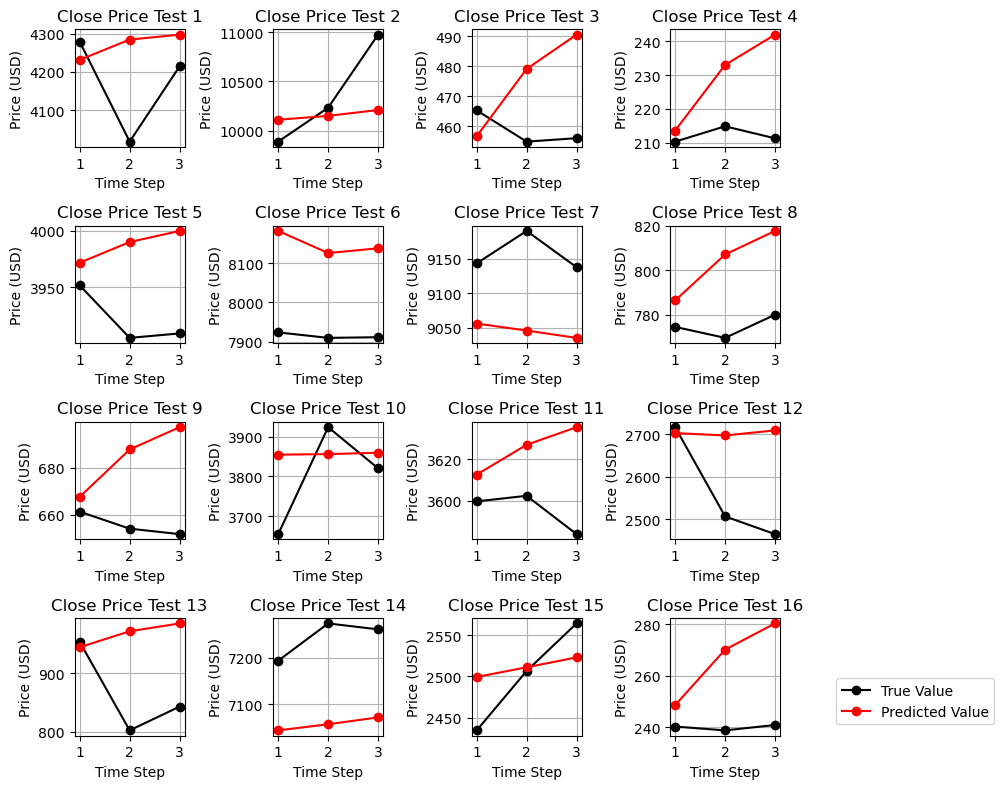

In [18]:
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, y_pred[i], marker='o', linestyle='-', color='red', label='Predicted Value')
    ax.set_title(f'Close Price Test {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.5, 0.5), borderaxespad=0.1)

# Show plot
plt.show()

In [19]:
num_experiments = 30 # ensure result is consistent
rmse = []
rmse_1 = [] # steps ahead rmse values across experiments
rmse_2 = []
rmse_3 = []
mae = []
mae_1 = []
mae_2 = []
mae_3 = []
mape = []
mape_1 = []
mape_2 = []
mape_3 = []
seed = 5925

In [20]:
for i in range(num_experiments):
    X_train, X_test, y_train, y_test = split_series(Closed_Price_scaled, input_size, output_size, train_ratio, seed)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse.append(np.sqrt(mse))

    pred_1 = y_pred[:, 0] # prediction at future time step = 1 (Normalised)
    pred_2 = y_pred[:, 1] 
    pred_3 = y_pred[:, 2]
    
    actual_1 = [data[0] for data in y_test]
    actual_2 = [data[1] for data in y_test]
    actual_3 = [data[2] for data in y_test]

    mse_1 = mean_squared_error(pred_1, actual_1)
    mse_2 = mean_squared_error(pred_2, actual_2)
    mse_3 = mean_squared_error(pred_3, actual_3)
    rmse_1.append(np.sqrt(mse_1))
    rmse_2.append(np.sqrt(mse_2)) 
    rmse_3.append(np.sqrt(mse_3)) 

    # Inverse Transform
    predicted_values = scaler.inverse_transform(y_pred)
    predicted_values_1 = predicted_values[:, 0] # prediction at future time step = 1 (Inverse Transformed)
    predicted_values_2 = predicted_values[:, 1]
    predicted_values_3 = predicted_values[:, 2]
    
    actual_values = scaler.inverse_transform(y_test)
    actual_values_1 = [data[0] for data in actual_values]
    actual_values_2 = [data[1] for data in actual_values]
    actual_values_3 = [data[2] for data in actual_values]
    
    mae.append(mean_absolute_error(actual_values, predicted_values))
    # Individual time steps
    mae_1.append(mean_absolute_error(actual_values_1, predicted_values_1))
    mae_2.append(mean_absolute_error(actual_values_2, predicted_values_2))
    mae_3.append(mean_absolute_error(actual_values_3, predicted_values_3))
    
    mape.append(mean_absolute_percentage_error(actual_values, predicted_values))
    # Individual time steps
    mape_1.append(mean_absolute_percentage_error(actual_values_1, predicted_values_1))
    mape_2.append(mean_absolute_percentage_error(actual_values_2, predicted_values_2))
    mape_3.append(mean_absolute_percentage_error(actual_values_3, predicted_values_3))
    
    print(f"Exp {i+1} on test set: RMSE: {rmse[i]:.4f}, MAE: {mae[i]:.2f}, MAPE: {mape[i]:.4f}")
    seed += 1

print("--------------------------------------------")
print(f"Univariate Linear Regression Avg RMSE: {np.mean(rmse):.4f}, Avg MAE: {np.mean(mae):.2f}, Avg MAPE: {np.mean(mape)*100:.3f}%")
print(f"At time step 1, Avg RMSE: {np.mean(rmse_1):.4f}, Avg MAE: {np.mean(mae_1):.2f}, Avg MAPE: {np.mean(mape_1)*100:.3f}%")
print(f"At time step 2, Avg RMSE: {np.mean(rmse_2):.4f}, Avg MAE: {np.mean(mae_2):.2f}, Avg MAPE: {np.mean(mape_2)*100:.3f}%")
print(f"At time step 3, Avg RMSE: {np.mean(rmse_3):.4f}, Avg MAE: {np.mean(mae_3):.2f}, Avg MAPE: {np.mean(mape_3)*100:.3f}%")

Exp 1 on test set: RMSE: 0.0125, MAE: 285.96, MAPE: 0.0781
Exp 2 on test set: RMSE: 0.0135, MAE: 338.54, MAPE: 0.0568
Exp 3 on test set: RMSE: 0.0126, MAE: 301.17, MAPE: 0.0764
Exp 4 on test set: RMSE: 0.0121, MAE: 279.02, MAPE: 0.0638
Exp 5 on test set: RMSE: 0.0135, MAE: 318.72, MAPE: 0.0731
Exp 6 on test set: RMSE: 0.0120, MAE: 275.37, MAPE: 0.0639
Exp 7 on test set: RMSE: 0.0141, MAE: 319.15, MAPE: 0.0432
Exp 8 on test set: RMSE: 0.0118, MAE: 276.59, MAPE: 0.0724
Exp 9 on test set: RMSE: 0.0136, MAE: 295.72, MAPE: 0.0503
Exp 10 on test set: RMSE: 0.0141, MAE: 303.25, MAPE: 0.0515
Exp 11 on test set: RMSE: 0.0136, MAE: 310.88, MAPE: 0.0711
Exp 12 on test set: RMSE: 0.0108, MAE: 287.45, MAPE: 0.0804
Exp 13 on test set: RMSE: 0.0128, MAE: 290.57, MAPE: 0.0556
Exp 14 on test set: RMSE: 0.0128, MAE: 310.48, MAPE: 0.0738
Exp 15 on test set: RMSE: 0.0119, MAE: 270.52, MAPE: 0.0581
Exp 16 on test set: RMSE: 0.0118, MAE: 281.08, MAPE: 0.0696
Exp 17 on test set: RMSE: 0.0108, MAE: 285.43, MA

In [21]:
## Quantile Regression - Univariate BTC
Close_Price = Bitcoin.iloc[:, 7].copy() # we are only interested in close price
Close_Price_reshaped = np.array(Close_Price).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
Closed_Price_scaled = scaler.fit_transform(Close_Price_reshaped).flatten()

In [22]:
# Usage
input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

In [23]:
X_train, X_test, y_train, y_test = split_series(Closed_Price_scaled, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [24]:
from scipy.optimize import minimize

In [25]:
# tilted loss function - crux of quantile regression
def tilted_loss(beta, X, y, tau):
    y_pred = np.dot(X, beta.reshape(X.shape[1], -1)) # multi step ahead version
    u = y - y_pred
    loss = np.where(u >= 0, tau * u, (tau - 1) * u)
    return np.sum(loss)

In [26]:
quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

In [27]:
# Use a dictionary to store the results
results = {
    0.05: [],
    0.25: [],
    0.5:  [],
    0.75: [],
    0.95: []
}

In [28]:
# Minimize the tilted loss
for i in quantile:
    
    # Initial guess for beta (linear regression coefficients)
    initial_beta = np.zeros((X_train.shape[1], output_size)).flatten()
    result = minimize(tilted_loss, initial_beta, args=(X_train, y_train, i), method='BFGS')
    beta_hat = result.x.reshape(X_train.shape[1], output_size)
    # Evaluate the model
    y_pred_test = np.dot(X_test, beta_hat)
    y_pred_test = scaler.inverse_transform(y_pred_test)
    results[i] = y_pred_test

    # Print first few predictions for inspection
    print(f"Quantile {i}: First few test predictions")
    print(y_pred_test[:5])

y_test = scaler.inverse_transform(y_test)
print('Actual Values: First few test predictions')
print(y_test[:5])

Quantile 0.05: First few test predictions
[[4019.90224022 3911.21548258 3709.92743494]
 [9486.79349369 9054.29098983 8909.72100115]
 [ 420.77869348  405.61261124  397.28390287]
 [ 186.81947519  189.41480376  185.69756067]
 [3698.77368409 3594.16884644 3491.26324436]]
Quantile 0.25: First few test predictions
[[4177.21036597 4142.47766375 4140.0693201 ]
 [9898.6996039  9782.70108467 9822.95589205]
 [ 437.35424812  430.9372883   431.77916798]
 [ 196.12711638  196.74720602  191.88633757]
 [3888.86963328 3840.70455714 3819.08237661]]
Quantile 0.5: First few test predictions
[[ 4231.93839415  4250.38409546  4245.87294721]
 [10089.56032411 10196.59527374 10142.41309373]
 [  444.18542946   445.09144353   444.44197897]
 [  200.64937877   200.23315035   199.67179391]
 [ 3968.23633046  3974.03676376  3966.89055016]]
Quantile 0.75: First few test predictions
[[ 4337.12325236  4362.48235593  4431.85791832]
 [10288.47641216 10496.89168529 10544.08284341]
 [  452.78327306   460.44861942   461.894394

In [29]:
results[0.05]

array([[4019.90224022, 3911.21548258, 3709.92743494],
       [9486.79349369, 9054.29098983, 8909.72100115],
       [ 420.77869348,  405.61261124,  397.28390287],
       ...,
       [7513.93810092, 7318.32830579, 7137.22702321],
       [ 225.48176421,  221.29890719,  214.37394325],
       [ 304.77507155,  298.37632479,  292.71912651]])

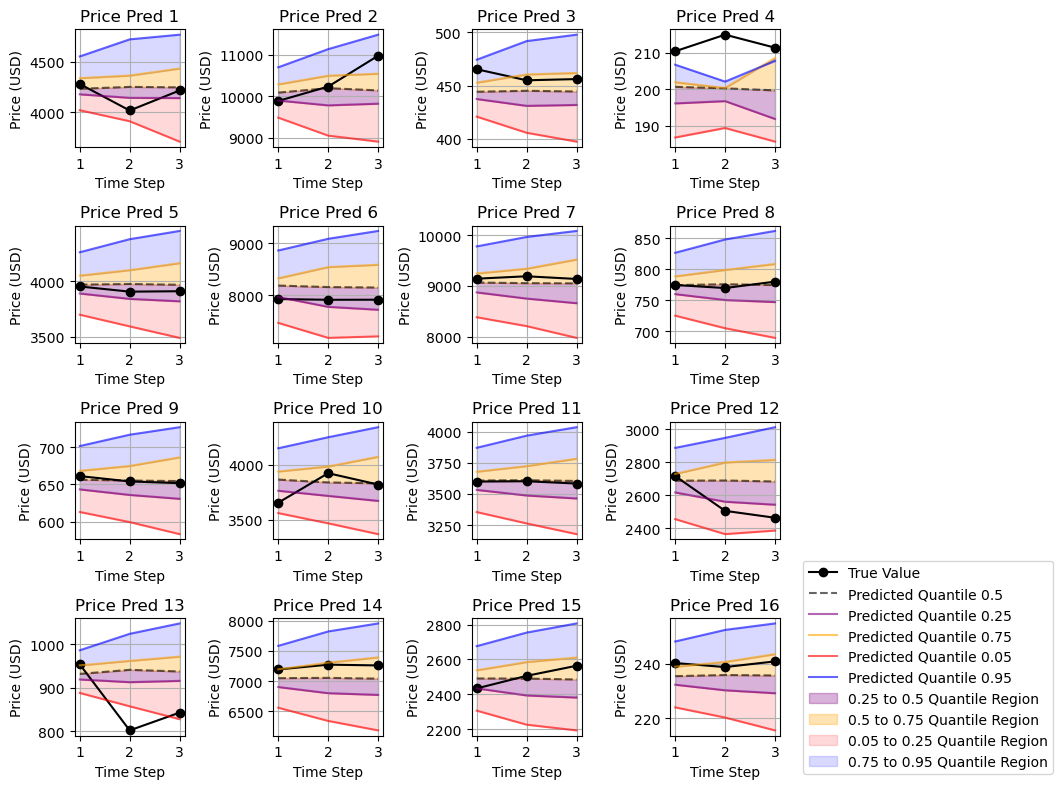

In [30]:
time_steps = [1, 2, 3]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, results[0.5][i], linestyle='--', color='black', label='Predicted Quantile 0.5', alpha=0.6)
    ax.plot(time_steps, results[0.25][i], linestyle='-', color='purple', label='Predicted Quantile 0.25', alpha=0.6)
    ax.plot(time_steps, results[0.75][i], linestyle='-', color='orange', label='Predicted Quantile 0.75', alpha=0.6)
    ax.plot(time_steps, results[0.05][i], linestyle='-', color='red', label='Predicted Quantile 0.05', alpha=0.6)
    ax.plot(time_steps, results[0.95][i], linestyle='-', color='blue', label='Predicted Quantile 0.95', alpha=0.6)
    
    # Highlight regions between quantiles
    ax.fill_between(time_steps, results[0.25][i], results[0.5][i], color='purple', alpha=0.3, label='0.25 to 0.5 Quantile Region')
    ax.fill_between(time_steps, results[0.5][i], results[0.75][i], color='orange', alpha=0.3, label='0.5 to 0.75 Quantile Region')
    ax.fill_between(time_steps, results[0.05][i], results[0.25][i], color='red', alpha=0.15, label='0.05 to 0.25 Quantile Region')
    ax.fill_between(time_steps, results[0.75][i], results[0.95][i], color='blue', alpha=0.15, label='0.75 to 0.95 Quantile Region')

    ax.set_title(f'Price Pred {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.2, 1.5), borderaxespad=0.1)
plt.show()

In [31]:
num_experiments = 30
seed = 5925

rmse = []
rmse_005 = [] # steps ahead rmse values across different quantiles
rmse_025 = []
rmse_050 = []
rmse_075 = []
rmse_095 = []
rmse_1 = [] # steps ahead rmse values across different experiments - median (0.5)
rmse_2 = []
rmse_3 = []

mae = []
mae_1 = []
mae_2 = []
mae_3 = []
mape = []
mape_1 = []
mape_2 = []
mape_3 = []

In [32]:
quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

In [33]:
for i in range(num_experiments):
    X_train, X_test, y_train, y_test = split_series(Closed_Price_scaled, input_size, output_size, train_ratio, seed)
    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

    results = {
        0.05: [],
        0.25: [],
        0.5:  [],
        0.75: [],
        0.95: []
    }

    for q in quantile:
        initial_beta = np.zeros((X_train.shape[1], output_size)).flatten()
        result = minimize(tilted_loss, initial_beta, args=(X_train, y_train, q), method='BFGS')
        beta_hat = result.x.reshape(X_train.shape[1], output_size)
        y_pred_test = np.dot(X_test, beta_hat)
        results[q] = y_pred_test

    mse = mean_squared_error(results[0.5], y_test)
    rmse.append(np.sqrt(mse))

    pred_1 = results[0.5][:, 0] # prediction at future time step = 1 (Normalised)
    pred_2 = results[0.5][:, 1] 
    pred_3 = results[0.5][:, 2]
    
    actual_1 = [data[0] for data in y_test]
    actual_2 = [data[1] for data in y_test]
    actual_3 = [data[2] for data in y_test]
    
    # Quantile Average RMSE across 3 steps
    mse_005 = mean_squared_error(results[0.05], y_test)
    mse_025 = mean_squared_error(results[0.25], y_test)
    mse_050 = mean_squared_error(results[0.5], y_test)
    mse_075 = mean_squared_error(results[0.75], y_test)
    mse_095 = mean_squared_error(results[0.95], y_test)
    rmse_005.append(np.sqrt(mse_005))
    rmse_025.append(np.sqrt(mse_025))
    rmse_050.append(np.sqrt(mse_050))
    rmse_075.append(np.sqrt(mse_075))
    rmse_095.append(np.sqrt(mse_095))

    # Steps Ahead RMSE: only interested in prediction (median: 0.5)
    mse_1 = mean_squared_error(pred_1, actual_1)
    mse_2 = mean_squared_error(pred_2, actual_2)
    mse_3 = mean_squared_error(pred_3, actual_3)
    rmse_1.append(np.sqrt(mse_1))
    rmse_2.append(np.sqrt(mse_2))
    rmse_3.append(np.sqrt(mse_3))
    
    # Inverse Transform
    predicted_values = scaler.inverse_transform(results[0.5])
    predicted_values_1 = predicted_values[:, 0] # prediction at future time step = 1 (Inverse Transformed)
    predicted_values_2 = predicted_values[:, 1]
    predicted_values_3 = predicted_values[:, 2]

    actual_values = scaler.inverse_transform(y_test)
    actual_values_1 = [data[0] for data in actual_values]
    actual_values_2 = [data[1] for data in actual_values]
    actual_values_3 = [data[2] for data in actual_values]
    
    mae.append(mean_absolute_error(actual_values, predicted_values))
    # Individual time steps
    mae_1.append(mean_absolute_error(actual_values_1, predicted_values_1))
    mae_2.append(mean_absolute_error(actual_values_2, predicted_values_2))
    mae_3.append(mean_absolute_error(actual_values_3, predicted_values_3))
    
    mape.append(mean_absolute_percentage_error(actual_values, predicted_values))
    # Individual time steps
    mape_1.append(mean_absolute_percentage_error(actual_values_1, predicted_values_1))
    mape_2.append(mean_absolute_percentage_error(actual_values_2, predicted_values_2))
    mape_3.append(mean_absolute_percentage_error(actual_values_3, predicted_values_3))

    print(f"Exp {i+1} on test set: RMSE: {rmse[i]:.4f}, MAE: {mae[i]:.2f}, MAPE: {mape[i]:.4f}")
    seed += 1

print("--------------------------------------------")
print(f"Univariate Quantile Regression Avg RMSE: {np.mean(rmse):.4f}, Avg MAE: {np.mean(mae):.2f}, Avg MAPE: {np.mean(mape)*100:.3f}%")
print(f"At time step 1, Avg RMSE: {np.mean(rmse_1):.4f}, Avg MAE: {np.mean(mae_1):.2f}, Avg MAPE: {np.mean(mape_1)*100:.3f}%")
print(f"At time step 2, Avg RMSE: {np.mean(rmse_2):.4f}, Avg MAE: {np.mean(mae_2):.2f}, Avg MAPE: {np.mean(mape_2)*100:.3f}%")
print(f"At time step 3, Avg RMSE: {np.mean(rmse_3):.4f}, Avg MAE: {np.mean(mae_3):.2f}, Avg MAPE: {np.mean(mape_3)*100:.3f}%")
print("--------------------------------------------")
print(f"At Quantile 0.05, it has Avg RMSE: {np.mean(rmse_005):.4f}")
print(f"At Quantile 0.25, it has Avg RMSE: {np.mean(rmse_025):.4f}")
print(f"At Quantile 0.50, it has Avg RMSE: {np.mean(rmse_050):.4f}")
print(f"At Quantile 0.75, it has Avg RMSE: {np.mean(rmse_075):.4f}")
print(f"At Quantile 0.95, it has Avg RMSE: {np.mean(rmse_095):.4f}")

Exp 1 on test set: RMSE: 0.0126, MAE: 275.99, MAPE: 0.0412
Exp 2 on test set: RMSE: 0.0134, MAE: 332.42, MAPE: 0.0390
Exp 3 on test set: RMSE: 0.0124, MAE: 288.72, MAPE: 0.0392
Exp 4 on test set: RMSE: 0.0120, MAE: 271.76, MAPE: 0.0394
Exp 5 on test set: RMSE: 0.0132, MAE: 306.22, MAPE: 0.0416
Exp 6 on test set: RMSE: 0.0119, MAE: 265.93, MAPE: 0.0393
Exp 7 on test set: RMSE: 0.0140, MAE: 315.85, MAPE: 0.0393
Exp 8 on test set: RMSE: 0.0117, MAE: 267.26, MAPE: 0.0380
Exp 9 on test set: RMSE: 0.0136, MAE: 292.29, MAPE: 0.0380
Exp 10 on test set: RMSE: 0.0141, MAE: 300.68, MAPE: 0.0381
Exp 11 on test set: RMSE: 0.0135, MAE: 301.23, MAPE: 0.0385
Exp 12 on test set: RMSE: 0.0107, MAE: 274.93, MAPE: 0.0402
Exp 13 on test set: RMSE: 0.0129, MAE: 285.56, MAPE: 0.0367
Exp 14 on test set: RMSE: 0.0126, MAE: 297.92, MAPE: 0.0368
Exp 15 on test set: RMSE: 0.0119, MAE: 265.23, MAPE: 0.0402
Exp 16 on test set: RMSE: 0.0117, MAE: 271.28, MAPE: 0.0376
Exp 17 on test set: RMSE: 0.0108, MAE: 279.57, MA

In [34]:
## BTC - multivariate version
## linear regression
# from sklearn.preprocessing import MinMaxScaler

In [35]:
data = Bitcoin.iloc[:, 4:]

In [36]:
features = data[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']]
features = MinMaxScaler().fit_transform(features) # normalise input
target = data['Close']
# normalise output
target_reshaped = np.array(target).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
target = scaler.fit_transform(target_reshaped).flatten()

In [37]:
input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

In [38]:
# I think split_series function is the same as split_data function - take note when implementing into Python
def split_data(data, input_size, output_size, train_ratio, seed):
    X, y = [], [] 
    total_size = input_size + output_size
    for i in range(len(data) - total_size + 1):
        X.append(features[i:i + input_size])                            
        y.append(target[i + input_size:i + total_size])        
    # 2. shuffle batches and split into train/test
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = train_ratio, random_state=seed)
    
    return X_train, X_test, Y_train, Y_test

In [39]:
X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [40]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [41]:
model = LinearRegression()
model.fit(X_train_reshaped, y_train)

LinearRegression()

In [42]:
y_pred = model.predict(X_test_reshaped)

In [43]:
# Inverse Transform
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [44]:
y_pred

array([[4266.06106289, 4355.10761387, 4306.19662236],
       [9986.63453912, 9965.63692495, 9937.01219644],
       [ 438.67415547,  464.45732228,  470.70526128],
       ...,
       [8031.94699733, 8193.04303654, 8198.92084842],
       [ 246.243036  ,  255.20947024,  254.84469276],
       [ 328.33999558,  338.51705854,  342.56437732]])

In [45]:
y_test

array([[ 4278.84645524,  4017.26845712,  4214.67193177],
       [ 9888.61035156, 10233.59960938, 10975.59960938],
       [  465.3210144 ,   454.93399048,   456.07800293],
       ...,
       [ 8192.49400532,  8144.19451744,  8827.76442606],
       [  257.3210144 ,   234.82499695,   233.84300232],
       [  320.04598999,   328.20599365,   352.68399048]])

In [46]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE on test set: {mape}") 
# Without Normalisation: 0.0628879547792754
# With Normalisation: 0.06288795076256944 (does minimal)

# MAPE = 0.05798883691005735 (all variables w/o normalisation), MAPE = 0.05798883810720637 (with normalisation)
# MAPE = 0.07140109215448538 (Features: 'High', 'Low', 'Open', 'Close')

MAPE on test set: 0.05798883810720637


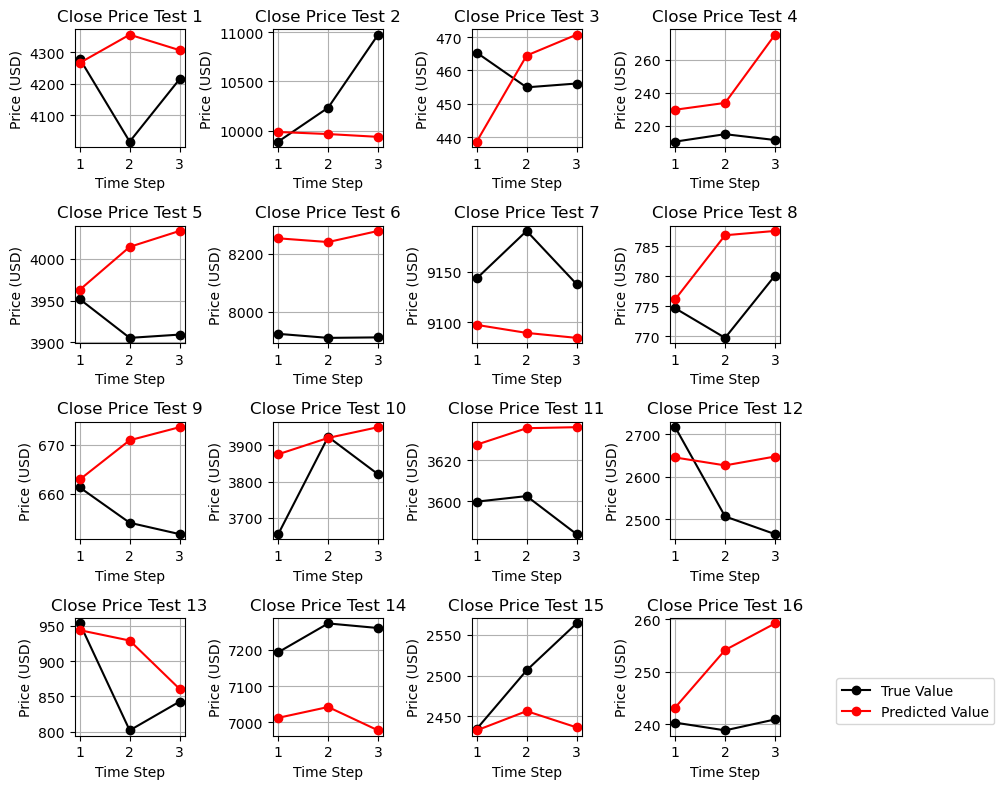

In [47]:
time_steps = [1, 2, 3]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, y_pred[i], marker='o', linestyle='-', color='red', label='Predicted Value')
    ax.set_title(f'Close Price Test {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.5, 0.5), borderaxespad=0.1)

# Show plot
plt.show()

In [48]:
# Notice that first point prediction is pretty freaking good, accuracy drops off with further time steps
# That is to be expected, is there a way to measure this?

# How do you determine the size of input/output?
# What is a good way to evaluate quantile regression model? MAPE only compares the median with actual data, what about the other quantiles?

In [49]:
num_experiments = 30 # ensure result is consistent
rmse = []
rmse_1 = [] # steps ahead rmse values across experiments
rmse_2 = []
rmse_3 = []
mae = []
mae_1 = []
mae_2 = []
mae_3 = []
mape = []
mape_1 = []
mape_2 = []
mape_3 = []
seed = 5925

In [50]:
for i in range(num_experiments):
    X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
    X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
    X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
    model = LinearRegression()
    model.fit(X_train_reshaped, y_train)
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    rmse.append(np.sqrt(mse))

    pred_1 = y_pred[:, 0] # prediction at future time step = 1 (Normalised)
    pred_2 = y_pred[:, 1] 
    pred_3 = y_pred[:, 2]
    actual_1 = y_test[:, 0]
    actual_2 = y_test[:, 1]
    actual_3 = y_test[:, 2]

    mse_1 = mean_squared_error(pred_1, actual_1)
    mse_2 = mean_squared_error(pred_2, actual_2)
    mse_3 = mean_squared_error(pred_3, actual_3)
    rmse_1.append(np.sqrt(mse_1))
    rmse_2.append(np.sqrt(mse_2)) 
    rmse_3.append(np.sqrt(mse_3)) 

    # Inverse Transform
    predicted_values = scaler.inverse_transform(y_pred)
    predicted_values_1 = predicted_values[:, 0] # prediction at future time step = 1 (Inverse Transformed)
    predicted_values_2 = predicted_values[:, 1]
    predicted_values_3 = predicted_values[:, 2]
    
    actual_values = scaler.inverse_transform(y_test)
    actual_values_1 = actual_values[:, 0]
    actual_values_2 = actual_values[:, 1]
    actual_values_3 = actual_values[:, 2]

    mae.append(mean_absolute_error(actual_values, predicted_values))
    # Individual time steps
    mae_1.append(mean_absolute_error(actual_values_1, predicted_values_1))
    mae_2.append(mean_absolute_error(actual_values_2, predicted_values_2))
    mae_3.append(mean_absolute_error(actual_values_3, predicted_values_3))
    
    mape.append(mean_absolute_percentage_error(actual_values, predicted_values))
    # Individual time steps
    mape_1.append(mean_absolute_percentage_error(actual_values_1, predicted_values_1))
    mape_2.append(mean_absolute_percentage_error(actual_values_2, predicted_values_2))
    mape_3.append(mean_absolute_percentage_error(actual_values_3, predicted_values_3))

    print(f"Exp {i+1} on test set: RMSE: {rmse[i]:.4f}, MAE: {mae[i]:.2f}, MAPE: {mape[i]:.4f}")
    seed += 1

print("--------------------------------------------")
print(f"Multivariate Linear Regression Avg RMSE: {np.mean(rmse):.4f}, Avg MAE: {np.mean(mae):.2f}, Avg MAPE: {np.mean(mape)*100:.3f}%")
print(f"At time step 1, Avg RMSE: {np.mean(rmse_1):.4f}, Avg MAE: {np.mean(mae_1):.2f}, Avg MAPE: {np.mean(mape_1)*100:.3f}%")
print(f"At time step 2, Avg RMSE: {np.mean(rmse_2):.4f}, Avg MAE: {np.mean(mae_2):.2f}, Avg MAPE: {np.mean(mape_2)*100:.3f}%")
print(f"At time step 3, Avg RMSE: {np.mean(rmse_3):.4f}, Avg MAE: {np.mean(mae_3):.2f}, Avg MAPE: {np.mean(mape_3)*100:.3f}%")
# Avg MAPE: 5.424% (All variables)
# Avg MAPE: 6.41% (Features: 'High', 'Low', 'Open', 'Close')

Exp 1 on test set: RMSE: 0.0136, MAE: 302.74, MAPE: 0.0580
Exp 2 on test set: RMSE: 0.0146, MAE: 354.99, MAPE: 0.0606
Exp 3 on test set: RMSE: 0.0137, MAE: 310.57, MAPE: 0.0638
Exp 4 on test set: RMSE: 0.0125, MAE: 284.87, MAPE: 0.0543
Exp 5 on test set: RMSE: 0.0154, MAE: 338.37, MAPE: 0.0617
Exp 6 on test set: RMSE: 0.0131, MAE: 295.37, MAPE: 0.0681
Exp 7 on test set: RMSE: 0.0154, MAE: 342.73, MAPE: 0.0470
Exp 8 on test set: RMSE: 0.0125, MAE: 288.64, MAPE: 0.0464
Exp 9 on test set: RMSE: 0.0145, MAE: 315.33, MAPE: 0.0598
Exp 10 on test set: RMSE: 0.0148, MAE: 321.53, MAPE: 0.0508
Exp 11 on test set: RMSE: 0.0136, MAE: 314.16, MAPE: 0.0630
Exp 12 on test set: RMSE: 0.0122, MAE: 301.39, MAPE: 0.0455
Exp 13 on test set: RMSE: 0.0134, MAE: 306.62, MAPE: 0.0497
Exp 14 on test set: RMSE: 0.0140, MAE: 329.40, MAPE: 0.0583
Exp 15 on test set: RMSE: 0.0132, MAE: 290.81, MAPE: 0.0480
Exp 16 on test set: RMSE: 0.0138, MAE: 314.94, MAPE: 0.0665
Exp 17 on test set: RMSE: 0.0121, MAE: 307.88, MA

In [51]:
## Multivariate case: Quantile Regression version

In [52]:
# Never give up...
data = Bitcoin.iloc[:, 4:]
features = data[['High', 'Low', 'Open', 'Close']]
features = MinMaxScaler().fit_transform(features) # normalise input
target = data['Close']
target_reshaped = np.array(target).reshape(-1, 1) # normalise output
scaler = MinMaxScaler(feature_range=(0, 1))
target = scaler.fit_transform(target_reshaped).flatten()

input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

def split_data(data, input_size, output_size, train_ratio, seed):
    X, y = [], [] 
    total_size = input_size + output_size
    for i in range(len(data) - total_size + 1):
        X.append(features[i:i + input_size])                            
        y.append(target[i + input_size:i + total_size])        
    # 2. shuffle batches and split into train/test
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = train_ratio, random_state=seed)
    
    return X_train, X_test, Y_train, Y_test

X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

from scipy.optimize import minimize

quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

# Use a dictionary to store the results
results = {
    0.05: [],
    0.25: [],
    0.5:  [],
    0.75: [],
    0.95: []
}

In [53]:
def tilted_loss(beta, X, y, tau):
    y_pred = np.dot(X, beta.reshape(X.shape[1], y.shape[1]))    
    u = y - y_pred
    loss = np.where(u >= 0, tau * u, (tau - 1) * u)
    return np.sum(loss)

In [54]:
for i in quantile:
    initial_beta = np.zeros((X_train.shape[1] * X_train.shape[2], output_size)).flatten()
    result = minimize(tilted_loss, initial_beta, args=(X_train_reshaped, y_train, i), method = 'BFGS')
    beta_hat = result.x.reshape((X_train_reshaped.shape[1], output_size))
    y_pred_test = np.dot(X_test_reshaped, beta_hat)
    y_pred_test = scaler.inverse_transform(y_pred_test)
    results[i] = y_pred_test

    # Print first few predictions for inspection
    print(f"Quantile {i}: First few test predictions")
    print(y_pred_test[:5])

y_test = scaler.inverse_transform(y_test)
print('Actual Values: First few test predictions')
print(y_test[:5])

Quantile 0.05: First few test predictions
[[4017.05018614 3950.26100953 3761.44674443]
 [9610.57667085 9111.88207983 9036.36565851]
 [ 422.06336818  408.24333024  421.77370587]
 [ 187.90353078  182.3016132   173.21624129]
 [3796.42678539 3697.85632956 3595.76782404]]
Quantile 0.25: First few test predictions
[[4133.72516847 4040.0656133  4033.38274211]
 [9820.71120696 9707.61254504 9660.74171037]
 [ 436.52969076  426.22901383  448.4352679 ]
 [ 199.55719844  193.41093931  190.40978132]
 [3899.75450565 3907.67758977 3836.2586169 ]]
Quantile 0.5: First few test predictions
[[ 4225.33668437  4282.15356404  4323.87525339]
 [10052.24233001 10178.20788036 10078.24605962]
 [  442.3130968    451.98490403   449.79868376]
 [  199.38670572   202.96714558   204.46050469]
 [ 3956.73303109  3959.25320143  4000.61543784]]
Quantile 0.75: First few test predictions
[[ 4358.27341946  4467.32792167  4506.16309075]
 [10356.60940638 10474.79633803 10672.08889519]
 [  450.20769913   455.62598746   451.719326

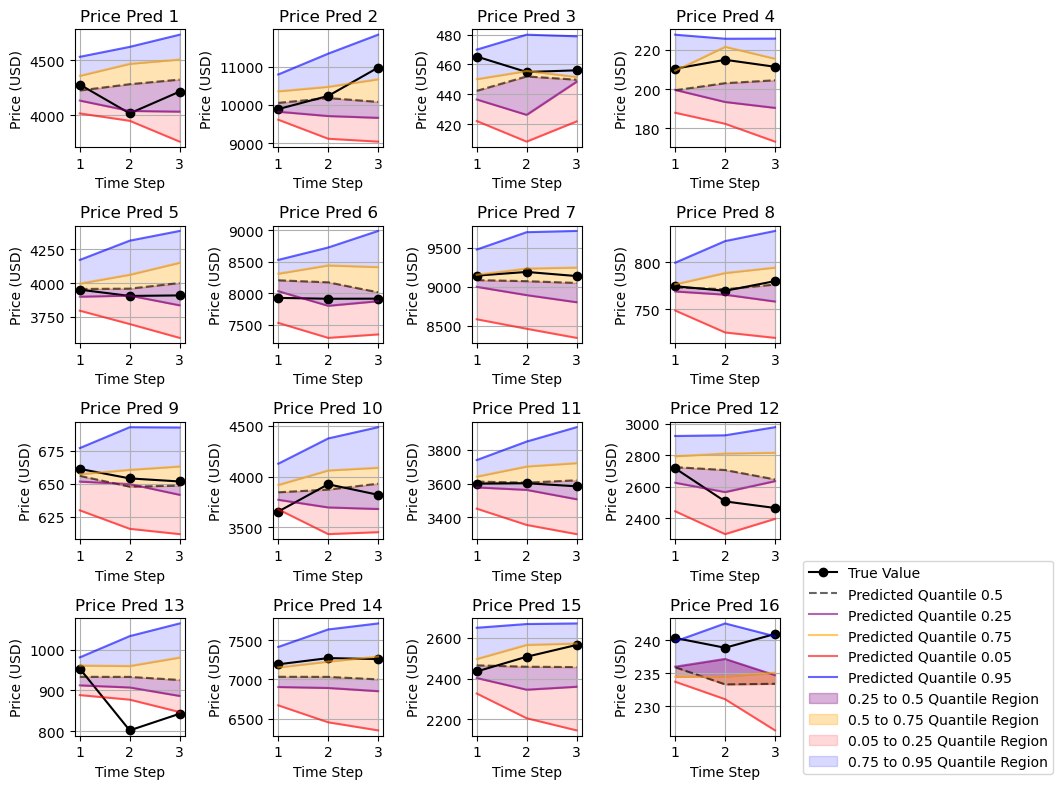

In [55]:
time_steps = [1, 2, 3]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, results[0.5][i], linestyle='--', color='black', label='Predicted Quantile 0.5', alpha=0.6)
    ax.plot(time_steps, results[0.25][i], linestyle='-', color='purple', label='Predicted Quantile 0.25', alpha=0.6)
    ax.plot(time_steps, results[0.75][i], linestyle='-', color='orange', label='Predicted Quantile 0.75', alpha=0.6)
    ax.plot(time_steps, results[0.05][i], linestyle='-', color='red', label='Predicted Quantile 0.05', alpha=0.6)
    ax.plot(time_steps, results[0.95][i], linestyle='-', color='blue', label='Predicted Quantile 0.95', alpha=0.6)
    
    # Highlight regions between quantiles
    ax.fill_between(time_steps, results[0.25][i], results[0.5][i], color='purple', alpha=0.3, label='0.25 to 0.5 Quantile Region')
    ax.fill_between(time_steps, results[0.5][i], results[0.75][i], color='orange', alpha=0.3, label='0.5 to 0.75 Quantile Region')
    ax.fill_between(time_steps, results[0.05][i], results[0.25][i], color='red', alpha=0.15, label='0.05 to 0.25 Quantile Region')
    ax.fill_between(time_steps, results[0.75][i], results[0.95][i], color='blue', alpha=0.15, label='0.75 to 0.95 Quantile Region')

    ax.set_title(f'Price Pred {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.2, 1.5), borderaxespad=0.1)
plt.show()

In [56]:
# Multivariate nature - feature selection is probably needed in order to perform better than univariate
# because there are more noises

# Perhaps there are more variables to consider so the prediction became more "unclear"?
# This issue is also evident in related paper, where their RMSE significantly increased for multivariate version

In [57]:
mape = mean_absolute_percentage_error(y_test, results[0.5])
print(f"Multivariate Quantile Regression Avg MAPE: {mape*100:.3f} %")

Multivariate Quantile Regression Avg MAPE: 4.333 %


In [58]:
## Testing various features combinations... Inefficiently
data = Bitcoin.iloc[:, 4:]
features = data[['High', 'Low', 'Open', 'Close']]
features = MinMaxScaler().fit_transform(features) # normalise input
target = data['Close']
target_reshaped = np.array(target).reshape(-1, 1) # normalise output
scaler = MinMaxScaler(feature_range=(0, 1))
target = scaler.fit_transform(target_reshaped).flatten()

def split_data(data, input_size, output_size, train_ratio, seed):
    X, y = [], [] 
    total_size = input_size + output_size
    for i in range(len(data) - total_size + 1):
        X.append(features[i:i + input_size])                            
        y.append(target[i + input_size:i + total_size])        
    # 2. shuffle batches and split into train/test
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = train_ratio, random_state=seed)
    
    return X_train, X_test, Y_train, Y_test

from scipy.optimize import minimize

In [59]:
num_experiments = 10
seed = 5925

input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8

rmse = []
rmse_005 = [] # steps ahead rmse values across different quantiles
rmse_025 = []
rmse_050 = []
rmse_075 = []
rmse_095 = []
rmse_1 = [] # steps ahead rmse values across different experiments - median (0.5)
rmse_2 = []
rmse_3 = []

mae = []
mae_1 = []
mae_2 = []
mae_3 = []
mape = []
mape_1 = []
mape_2 = []
mape_3 = []

In [60]:
for exp in range(num_experiments):
    
    X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
    X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
    X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

    quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

    # Use a dictionary to store the results
    results = {
        0.05: [],
        0.25: [],
        0.5:  [],
        0.75: [],
        0.95: []
    }
    
    for i in quantile:
        initial_beta = np.zeros((X_train.shape[1] * X_train.shape[2], output_size)).flatten()
        result = minimize(tilted_loss, initial_beta, args=(X_train_reshaped, y_train, i), method = 'BFGS')
        beta_hat = result.x.reshape((X_train_reshaped.shape[1], output_size))
        
        # Evaluate the model
        # y_pred_train = np.dot(X_train_reshaped, beta_hat)
        y_pred_test = np.dot(X_test_reshaped, beta_hat)
    
        # Calculate the tilted loss on the test set
        # test_loss = tilted_loss(beta_hat.flatten(), X_test_reshaped, y_test, i)
    
        results[i] = y_pred_test

    mse = mean_squared_error(results[0.5], y_test)
    rmse.append(np.sqrt(mse))

    pred_1 = results[0.5][:, 0] # prediction at future time step = 1 (Normalised)
    pred_2 = results[0.5][:, 1] 
    pred_3 = results[0.5][:, 2]
    
    actual_1 = y_test[:, 0]
    actual_2 = y_test[:, 1]
    actual_3 = y_test[:, 2]
    
    # Quantile Average RMSE across 3 steps
    mse_005 = mean_squared_error(results[0.05], y_test)
    mse_025 = mean_squared_error(results[0.25], y_test)
    mse_050 = mean_squared_error(results[0.5], y_test)
    mse_075 = mean_squared_error(results[0.75], y_test)
    mse_095 = mean_squared_error(results[0.95], y_test)
    rmse_005.append(np.sqrt(mse_005))
    rmse_025.append(np.sqrt(mse_025))
    rmse_050.append(np.sqrt(mse_050))
    rmse_075.append(np.sqrt(mse_075))
    rmse_095.append(np.sqrt(mse_095))

    # Steps Ahead RMSE: only interested in prediction (median: 0.5)
    mse_1 = mean_squared_error(pred_1, actual_1)
    mse_2 = mean_squared_error(pred_2, actual_2)
    mse_3 = mean_squared_error(pred_3, actual_3)
    rmse_1.append(np.sqrt(mse_1))
    rmse_2.append(np.sqrt(mse_2))
    rmse_3.append(np.sqrt(mse_3))
    
    # Inverse Transform
    predicted_values = scaler.inverse_transform(results[0.5])
    predicted_values_1 = predicted_values[:, 0] # prediction at future time step = 1 (Inverse Transformed)
    predicted_values_2 = predicted_values[:, 1]
    predicted_values_3 = predicted_values[:, 2]

    actual_values = scaler.inverse_transform(y_test)
    actual_values_1 = actual_values[:, 0]
    actual_values_2 = actual_values[:, 1]
    actual_values_3 = actual_values[:, 2]

    mae.append(mean_absolute_error(actual_values, predicted_values))
    # Individual time steps
    mae_1.append(mean_absolute_error(actual_values_1, predicted_values_1))
    mae_2.append(mean_absolute_error(actual_values_2, predicted_values_2))
    mae_3.append(mean_absolute_error(actual_values_3, predicted_values_3))
    
    mape.append(mean_absolute_percentage_error(actual_values, predicted_values))
    # Individual time steps
    mape_1.append(mean_absolute_percentage_error(actual_values_1, predicted_values_1))
    mape_2.append(mean_absolute_percentage_error(actual_values_2, predicted_values_2))
    mape_3.append(mean_absolute_percentage_error(actual_values_3, predicted_values_3))

    print(f"Exp {exp+1} on test set: RMSE: {rmse[exp]:.4f}, MAE: {mae[exp]:.2f}, MAPE: {mape[exp]:.4f}")
    seed += 1

print("--------------------------------------------")
print(f"Multivariate Quantile Regression Avg RMSE: {np.mean(rmse):.4f}, Avg MAE: {np.mean(mae):.2f}, Avg MAPE: {np.mean(mape)*100:.3f}%")
print(f"At time step 1, Avg RMSE: {np.mean(rmse_1):.4f}, Avg MAE: {np.mean(mae_1):.2f}, Avg MAPE: {np.mean(mape_1)*100:.3f}%")
print(f"At time step 2, Avg RMSE: {np.mean(rmse_2):.4f}, Avg MAE: {np.mean(mae_2):.2f}, Avg MAPE: {np.mean(mape_2)*100:.3f}%")
print(f"At time step 3, Avg RMSE: {np.mean(rmse_3):.4f}, Avg MAE: {np.mean(mae_3):.2f}, Avg MAPE: {np.mean(mape_3)*100:.3f}%")
print("--------------------------------------------")
print(f"At Quantile 0.05, it has Avg RMSE: {np.mean(rmse_005):.4f}")
print(f"At Quantile 0.25, it has Avg RMSE: {np.mean(rmse_025):.4f}")
print(f"At Quantile 0.50, it has Avg RMSE: {np.mean(rmse_050):.4f}")
print(f"At Quantile 0.75, it has Avg RMSE: {np.mean(rmse_075):.4f}")
print(f"At Quantile 0.95, it has Avg RMSE: {np.mean(rmse_095):.4f}")

Exp 1 on test set: RMSE: 0.0131, MAE: 289.00, MAPE: 0.0433
Exp 2 on test set: RMSE: 0.0144, MAE: 344.95, MAPE: 0.0413
Exp 3 on test set: RMSE: 0.0128, MAE: 293.31, MAPE: 0.0412
Exp 4 on test set: RMSE: 0.0121, MAE: 274.49, MAPE: 0.0410
Exp 5 on test set: RMSE: 0.0138, MAE: 309.74, MAPE: 0.0428
Exp 6 on test set: RMSE: 0.0124, MAE: 277.81, MAPE: 0.0409
Exp 7 on test set: RMSE: 0.0144, MAE: 324.37, MAPE: 0.0415
Exp 8 on test set: RMSE: 0.0121, MAE: 275.33, MAPE: 0.0405
Exp 9 on test set: RMSE: 0.0141, MAE: 297.99, MAPE: 0.0399
Exp 10 on test set: RMSE: 0.0147, MAE: 310.82, MAPE: 0.0402
--------------------------------------------
Multivariate Quantile Regression Avg RMSE: 0.0134, Avg MAE: 299.78, Avg MAPE: 4.125%
At time step 1, Avg RMSE: 0.0099, Avg MAE: 213.05, Avg MAPE: 2.824%
At time step 2, Avg RMSE: 0.0131, Avg MAE: 305.31, Avg MAPE: 4.196%
At time step 3, Avg RMSE: 0.0164, Avg MAE: 380.98, Avg MAPE: 5.356%
--------------------------------------------
At Quantile 0.05, it has Avg R

In [61]:
# Normalised, features = data[['High', 'Low', 'Open', 'Volume', 'Marketcap']]: 12.396 %
# Normalised, features = data[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']]: 12.271 %
# Unnormalised, features = data[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']]: 21.202%
# Normalised, features = data[['High', 'Low', 'Open', 'Volume']] - 14.4%
# Normalised, features = data[['High', 'Low', 'Open', 'Close', 'Volume']] - 13.794%
# Normalised, features = data[['High', 'Low', 'Open']] - 14.26%
# Normalised, features = data[['High', 'Low']] - 13.9%
# Normalised, features = data[['Open', 'Volume']] - 14.28%
# Normalised, features = data[['Close']] - 13.717% --- univariate case? How come MAPE still high?

# (Normalisation is affecting result)
# Unnormalised, features = data[['Close']] -- AVG: 3.931% (10 Experiments), AVG: 3.884% (30 Experiments)
# Unnormalised, features = data[['High', 'Low', 'Open', 'Close']] -- AVG: 4.067% (10 Experiments)
# Unnormalised, features = data[['High', 'Low', 'Close']] -- AVG: 4.023% (10 Experiments)

In [62]:
## DATA: ETHEREUM
## Univariate case: Linear Regression

Ethereum = pd.read_csv('data/coin_Ethereum.csv')
Close_Price = Ethereum.iloc[:, 7].copy() # we are only interested in close price
Close_Price_reshaped = np.array(Close_Price).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
Closed_Price_scaled = scaler.fit_transform(Close_Price_reshaped).flatten()

input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

X_train, X_test, y_train, y_test = split_series(Closed_Price_scaled, input_size, output_size, train_ratio, seed)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

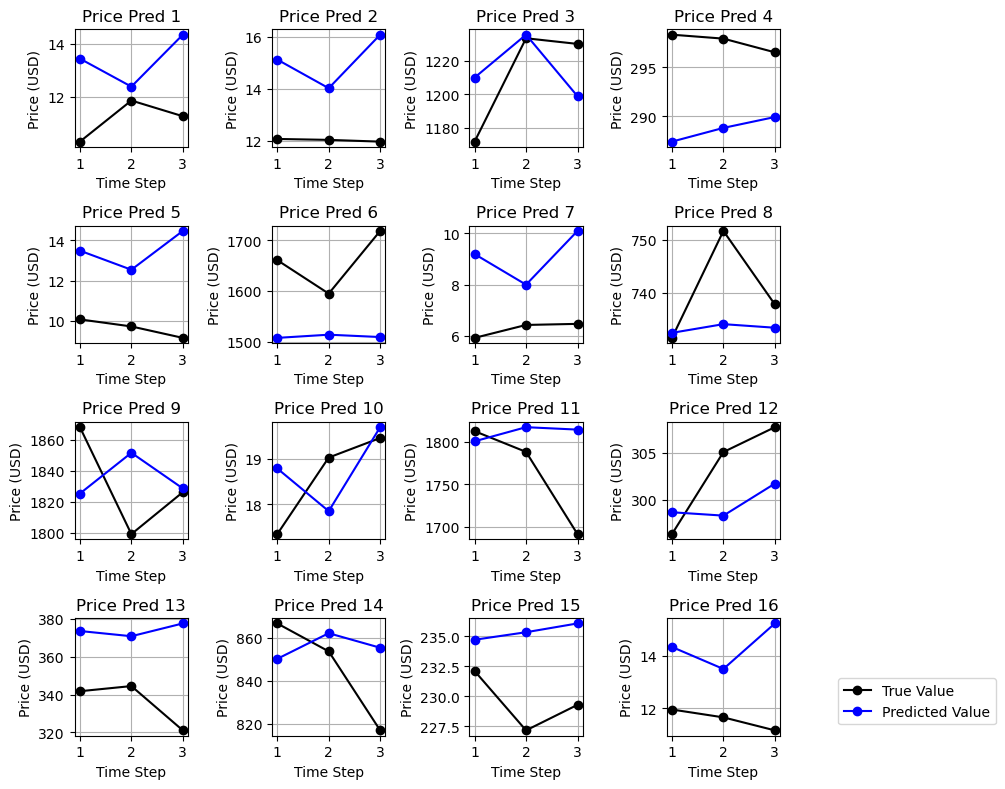

In [63]:
time_steps = [1, 2, 3]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, y_pred[i], marker='o', linestyle='-', color='blue', label='Predicted Value')
    ax.set_title(f'Price Pred {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.5, 0.5), borderaxespad=0.1)

# Show plot
plt.show()

In [64]:
Ethereum = pd.read_csv('data/coin_Ethereum.csv')
Close_Price = Ethereum.iloc[:, 7].copy() # we are only interested in close price
Close_Price_reshaped = np.array(Close_Price).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
Closed_Price_scaled = scaler.fit_transform(Close_Price_reshaped).flatten()

input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
num_experiments = 30 # ensure result is consistent
rmse = []
rmse_1 = [] # steps ahead rmse values across experiments
rmse_2 = []
rmse_3 = []
mae = []
mae_1 = []
mae_2 = []
mae_3 = []
mape = []
mape_1 = []
mape_2 = []
mape_3 = []

seed = 5925

for i in range(num_experiments):
    X_train, X_test, y_train, y_test = split_series(Closed_Price_scaled, input_size, output_size, train_ratio, seed)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse.append(np.sqrt(mse))

    pred_1 = y_pred[:, 0] # prediction at future time step = 1 (Normalised)
    pred_2 = y_pred[:, 1] 
    pred_3 = y_pred[:, 2]
    
    actual_1 = [data[0] for data in y_test]
    actual_2 = [data[1] for data in y_test]
    actual_3 = [data[2] for data in y_test]

    mse_1 = mean_squared_error(pred_1, actual_1)
    mse_2 = mean_squared_error(pred_2, actual_2)
    mse_3 = mean_squared_error(pred_3, actual_3)
    rmse_1.append(np.sqrt(mse_1))
    rmse_2.append(np.sqrt(mse_2)) 
    rmse_3.append(np.sqrt(mse_3)) 

    # Inverse Transform
    predicted_values = scaler.inverse_transform(y_pred)
    predicted_values_1 = predicted_values[:, 0] # prediction at future time step = 1 (Inverse Transformed)
    predicted_values_2 = predicted_values[:, 1]
    predicted_values_3 = predicted_values[:, 2]
    
    actual_values = scaler.inverse_transform(y_test)
    actual_values_1 = [data[0] for data in actual_values]
    actual_values_2 = [data[1] for data in actual_values]
    actual_values_3 = [data[2] for data in actual_values]
    
    mae.append(mean_absolute_error(actual_values, predicted_values))
    # Individual time steps
    mae_1.append(mean_absolute_error(actual_values_1, predicted_values_1))
    mae_2.append(mean_absolute_error(actual_values_2, predicted_values_2))
    mae_3.append(mean_absolute_error(actual_values_3, predicted_values_3))
    
    mape.append(mean_absolute_percentage_error(actual_values, predicted_values))
    # Individual time steps
    mape_1.append(mean_absolute_percentage_error(actual_values_1, predicted_values_1))
    mape_2.append(mean_absolute_percentage_error(actual_values_2, predicted_values_2))
    mape_3.append(mean_absolute_percentage_error(actual_values_3, predicted_values_3))
    
    print(f"Exp {i+1} on test set: RMSE: {rmse[i]:.4f}, MAE: {mae[i]:.2f}, MAPE: {mape[i]:.4f}")
    seed += 1

print("--------------------------------------------")
print(f"Univariate Linear Regression Avg RMSE: {np.mean(rmse):.4f}, Avg MAE: {np.mean(mae):.2f}, Avg MAPE: {np.mean(mape)*100:.3f}%")
print(f"At time step 1, Avg RMSE: {np.mean(rmse_1):.4f}, Avg MAE: {np.mean(mae_1):.2f}, Avg MAPE: {np.mean(mape_1)*100:.3f}%")
print(f"At time step 2, Avg RMSE: {np.mean(rmse_2):.4f}, Avg MAE: {np.mean(mae_2):.2f}, Avg MAPE: {np.mean(mape_2)*100:.3f}%")
print(f"At time step 3, Avg RMSE: {np.mean(rmse_3):.4f}, Avg MAE: {np.mean(mae_3):.2f}, Avg MAPE: {np.mean(mape_3)*100:.3f}%")
# Maybe MAPE is not a good indicator because ETH has lower values, therefore any miscalculation will cause a bigger percentage difference
# Changed MAPE to Mean Absolute Error (MAE), which is the average price difference between true and predicted value

# Why is MAPE so high? Are there some outlier in play, skewing the average percentage error?
# Experiments are not very consistent either for MAPE

Exp 1 on test set: RMSE: 0.0147, MAE: 23.70, MAPE: 0.3373
Exp 2 on test set: RMSE: 0.0140, MAE: 24.41, MAPE: 0.3819
Exp 3 on test set: RMSE: 0.0150, MAE: 23.12, MAPE: 0.4043
Exp 4 on test set: RMSE: 0.0149, MAE: 22.64, MAPE: 0.4897
Exp 5 on test set: RMSE: 0.0181, MAE: 27.95, MAPE: 0.1629
Exp 6 on test set: RMSE: 0.0093, MAE: 18.17, MAPE: 0.3957
Exp 7 on test set: RMSE: 0.0159, MAE: 26.27, MAPE: 0.4121
Exp 8 on test set: RMSE: 0.0155, MAE: 22.92, MAPE: 0.2133
Exp 9 on test set: RMSE: 0.0167, MAE: 25.30, MAPE: 0.3582
Exp 10 on test set: RMSE: 0.0155, MAE: 25.14, MAPE: 0.2832
Exp 11 on test set: RMSE: 0.0168, MAE: 24.03, MAPE: 0.3741
Exp 12 on test set: RMSE: 0.0133, MAE: 22.55, MAPE: 0.4353
Exp 13 on test set: RMSE: 0.0130, MAE: 23.30, MAPE: 0.4070
Exp 14 on test set: RMSE: 0.0190, MAE: 25.49, MAPE: 0.1817
Exp 15 on test set: RMSE: 0.0133, MAE: 22.00, MAPE: 0.4853
Exp 16 on test set: RMSE: 0.0192, MAE: 25.42, MAPE: 0.1573
Exp 17 on test set: RMSE: 0.0185, MAE: 28.27, MAPE: 0.1945
Exp 18

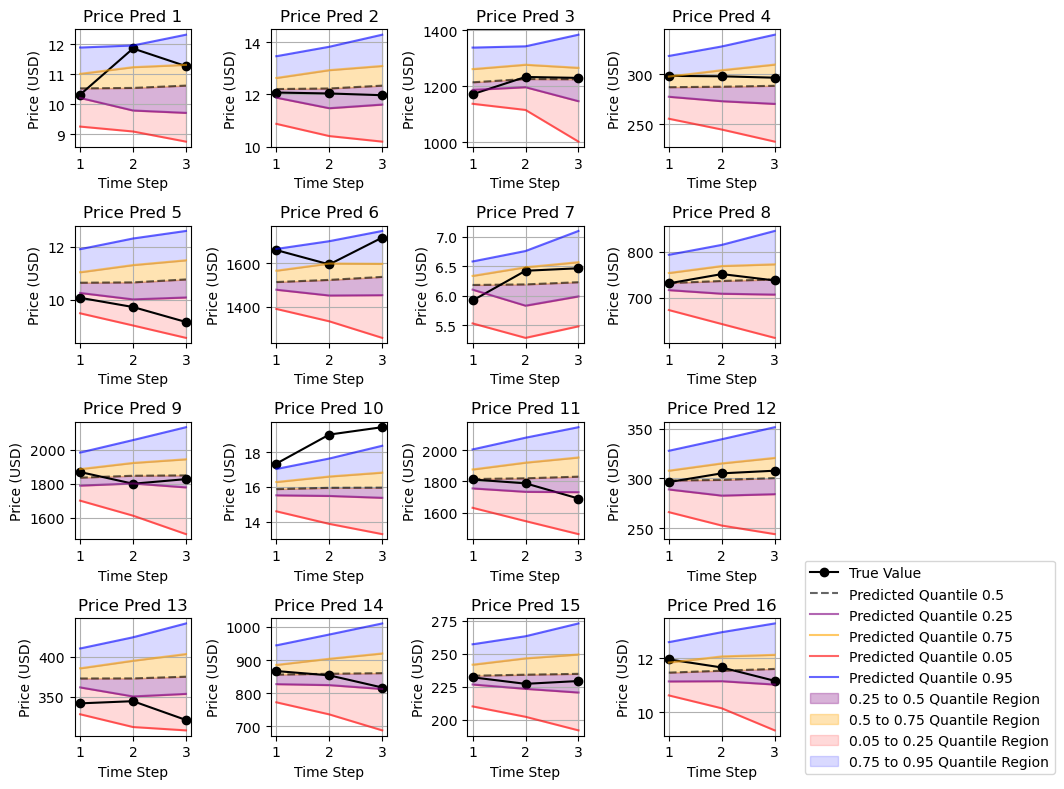

In [65]:
## Quantile Regression - Univariate ETH
Ethereum = pd.read_csv('data/coin_Ethereum.csv')
Close_Price = Ethereum.iloc[:, 7].copy() # we are only interested in close price
Close_Price_reshaped = np.array(Close_Price).reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
Close_Price_scaled = scaler.fit_transform(Close_Price_reshaped).flatten()

input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

X_train, X_test, y_train, y_test = split_series(Close_Price_scaled, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

from scipy.optimize import minimize

# tilted loss function - crux of quantile regression
def tilted_loss(beta, X, y, tau):
    y_pred = np.dot(X, beta.reshape(X.shape[1], -1)) # multi step ahead version
    u = y - y_pred
    loss = np.where(u >= 0, tau * u, (tau - 1) * u)
    return np.sum(loss)

quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

# Use a dictionary to store the results
results = {
    0.05: [],
    0.25: [],
    0.5:  [],
    0.75: [],
    0.95: []
}

# Minimize the tilted loss
for i in quantile:
    
    # Initial guess for beta (linear regression coefficients)
    initial_beta = np.zeros((X_train.shape[1], output_size)).flatten()
    result = minimize(tilted_loss, initial_beta, args=(X_train, y_train, i), method='BFGS')
    beta_hat = result.x.reshape(X_train.shape[1], output_size)
    # Evaluate the model
    # y_pred_train = np.dot(X_train, beta_hat)
    y_pred_test = np.dot(X_test, beta_hat)
    y_pred_test = scaler.inverse_transform(y_pred_test)
    results[i] = y_pred_test
    
y_test = scaler.inverse_transform(y_test)
time_steps = [1, 2, 3]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, results[0.5][i], linestyle='--', color='black', label='Predicted Quantile 0.5', alpha=0.6)
    ax.plot(time_steps, results[0.25][i], linestyle='-', color='purple', label='Predicted Quantile 0.25', alpha=0.6)
    ax.plot(time_steps, results[0.75][i], linestyle='-', color='orange', label='Predicted Quantile 0.75', alpha=0.6)
    ax.plot(time_steps, results[0.05][i], linestyle='-', color='red', label='Predicted Quantile 0.05', alpha=0.6)
    ax.plot(time_steps, results[0.95][i], linestyle='-', color='blue', label='Predicted Quantile 0.95', alpha=0.6)
    
    # Highlight regions between quantiles
    ax.fill_between(time_steps, results[0.25][i], results[0.5][i], color='purple', alpha=0.3, label='0.25 to 0.5 Quantile Region')
    ax.fill_between(time_steps, results[0.5][i], results[0.75][i], color='orange', alpha=0.3, label='0.5 to 0.75 Quantile Region')
    ax.fill_between(time_steps, results[0.05][i], results[0.25][i], color='red', alpha=0.15, label='0.05 to 0.25 Quantile Region')
    ax.fill_between(time_steps, results[0.75][i], results[0.95][i], color='blue', alpha=0.15, label='0.75 to 0.95 Quantile Region')

    ax.set_title(f'Price Pred {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.2, 1.5), borderaxespad=0.1)
plt.show()

In [66]:
num_experiments = 30
seed = 5925
rmse = []
rmse_005 = [] # steps ahead rmse values across different quantiles
rmse_025 = []
rmse_050 = []
rmse_075 = []
rmse_095 = []
rmse_1 = [] # steps ahead rmse values across different experiments - median (0.5)
rmse_2 = []
rmse_3 = []

mae = []
mae_1 = []
mae_2 = []
mae_3 = []
mape = []
mape_1 = []
mape_2 = []
mape_3 = []

quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

for i in range(num_experiments):
    X_train, X_test, y_train, y_test = split_series(Closed_Price_scaled, input_size, output_size, train_ratio, seed)
    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

    results = {
        0.05: [],
        0.25: [],
        0.5:  [],
        0.75: [],
        0.95: []
    }

    for q in quantile:
        initial_beta = np.zeros((X_train.shape[1], output_size)).flatten()
        result = minimize(tilted_loss, initial_beta, args=(X_train, y_train, q), method='BFGS')
        beta_hat = result.x.reshape(X_train.shape[1], output_size)
        y_pred_test = np.dot(X_test, beta_hat)
        results[q] = y_pred_test

    mse = mean_squared_error(results[0.5], y_test)
    rmse.append(np.sqrt(mse))

    pred_1 = results[0.5][:, 0] # prediction at future time step = 1 (Normalised)
    pred_2 = results[0.5][:, 1] 
    pred_3 = results[0.5][:, 2]
    
    actual_1 = [data[0] for data in y_test]
    actual_2 = [data[1] for data in y_test]
    actual_3 = [data[2] for data in y_test]
    
    # Quantile Average RMSE across 3 steps
    mse_005 = mean_squared_error(results[0.05], y_test)
    mse_025 = mean_squared_error(results[0.25], y_test)
    mse_050 = mean_squared_error(results[0.5], y_test)
    mse_075 = mean_squared_error(results[0.75], y_test)
    mse_095 = mean_squared_error(results[0.95], y_test)
    rmse_005.append(np.sqrt(mse_005))
    rmse_025.append(np.sqrt(mse_025))
    rmse_050.append(np.sqrt(mse_050))
    rmse_075.append(np.sqrt(mse_075))
    rmse_095.append(np.sqrt(mse_095))

    # Steps Ahead RMSE: only interested in prediction (median: 0.5)
    mse_1 = mean_squared_error(pred_1, actual_1)
    mse_2 = mean_squared_error(pred_2, actual_2)
    mse_3 = mean_squared_error(pred_3, actual_3)
    rmse_1.append(np.sqrt(mse_1))
    rmse_2.append(np.sqrt(mse_2))
    rmse_3.append(np.sqrt(mse_3))
    
    # Inverse Transform
    predicted_values = scaler.inverse_transform(results[0.5])
    predicted_values_1 = predicted_values[:, 0] # prediction at future time step = 1 (Inverse Transformed)
    predicted_values_2 = predicted_values[:, 1]
    predicted_values_3 = predicted_values[:, 2]

    actual_values = scaler.inverse_transform(y_test)
    actual_values_1 = [data[0] for data in actual_values]
    actual_values_2 = [data[1] for data in actual_values]
    actual_values_3 = [data[2] for data in actual_values]
    
    mae.append(mean_absolute_error(actual_values, predicted_values))
    # Individual time steps
    mae_1.append(mean_absolute_error(actual_values_1, predicted_values_1))
    mae_2.append(mean_absolute_error(actual_values_2, predicted_values_2))
    mae_3.append(mean_absolute_error(actual_values_3, predicted_values_3))
    
    mape.append(mean_absolute_percentage_error(actual_values, predicted_values))
    # Individual time steps
    mape_1.append(mean_absolute_percentage_error(actual_values_1, predicted_values_1))
    mape_2.append(mean_absolute_percentage_error(actual_values_2, predicted_values_2))
    mape_3.append(mean_absolute_percentage_error(actual_values_3, predicted_values_3))

    print(f"Exp {i+1} on test set: RMSE: {rmse[i]:.4f}, MAE: {mae[i]:.2f}, MAPE: {mape[i]:.4f}")
    seed += 1

print("--------------------------------------------")
print(f"Univariate Quantile Regression Avg RMSE: {np.mean(rmse):.4f}, Avg MAE: {np.mean(mae):.2f}, Avg MAPE: {np.mean(mape)*100:.3f}%")
print(f"At time step 1, Avg RMSE: {np.mean(rmse_1):.4f}, Avg MAE: {np.mean(mae_1):.2f}, Avg MAPE: {np.mean(mape_1)*100:.3f}%")
print(f"At time step 2, Avg RMSE: {np.mean(rmse_2):.4f}, Avg MAE: {np.mean(mae_2):.2f}, Avg MAPE: {np.mean(mape_2)*100:.3f}%")
print(f"At time step 3, Avg RMSE: {np.mean(rmse_3):.4f}, Avg MAE: {np.mean(mae_3):.2f}, Avg MAPE: {np.mean(mape_3)*100:.3f}%")
print("--------------------------------------------")
print(f"At Quantile 0.05, it has Avg RMSE: {np.mean(rmse_005):.4f}")
print(f"At Quantile 0.25, it has Avg RMSE: {np.mean(rmse_025):.4f}")
print(f"At Quantile 0.50, it has Avg RMSE: {np.mean(rmse_050):.4f}")
print(f"At Quantile 0.75, it has Avg RMSE: {np.mean(rmse_075):.4f}")
print(f"At Quantile 0.95, it has Avg RMSE: {np.mean(rmse_095):.4f}")

Exp 1 on test set: RMSE: 0.0145, MAE: 22.64, MAPE: 0.0569
Exp 2 on test set: RMSE: 0.0139, MAE: 23.54, MAPE: 0.0559
Exp 3 on test set: RMSE: 0.0145, MAE: 21.53, MAPE: 0.0555
Exp 4 on test set: RMSE: 0.0144, MAE: 21.57, MAPE: 0.0577
Exp 5 on test set: RMSE: 0.0171, MAE: 26.68, MAPE: 0.0608
Exp 6 on test set: RMSE: 0.0091, MAE: 17.02, MAPE: 0.0573
Exp 7 on test set: RMSE: 0.0157, MAE: 25.26, MAPE: 0.0572
Exp 8 on test set: RMSE: 0.0153, MAE: 22.17, MAPE: 0.0604
Exp 9 on test set: RMSE: 0.0165, MAE: 24.41, MAPE: 0.0606
Exp 10 on test set: RMSE: 0.0153, MAE: 24.25, MAPE: 0.0589
Exp 11 on test set: RMSE: 0.0166, MAE: 23.07, MAPE: 0.0605
Exp 12 on test set: RMSE: 0.0131, MAE: 21.75, MAPE: 0.0583
Exp 13 on test set: RMSE: 0.0127, MAE: 22.16, MAPE: 0.0582
Exp 14 on test set: RMSE: 0.0188, MAE: 25.06, MAPE: 0.0573
Exp 15 on test set: RMSE: 0.0124, MAE: 20.41, MAPE: 0.0559
Exp 16 on test set: RMSE: 0.0172, MAE: 23.52, MAPE: 0.0604
Exp 17 on test set: RMSE: 0.0185, MAE: 27.86, MAPE: 0.0591
Exp 18

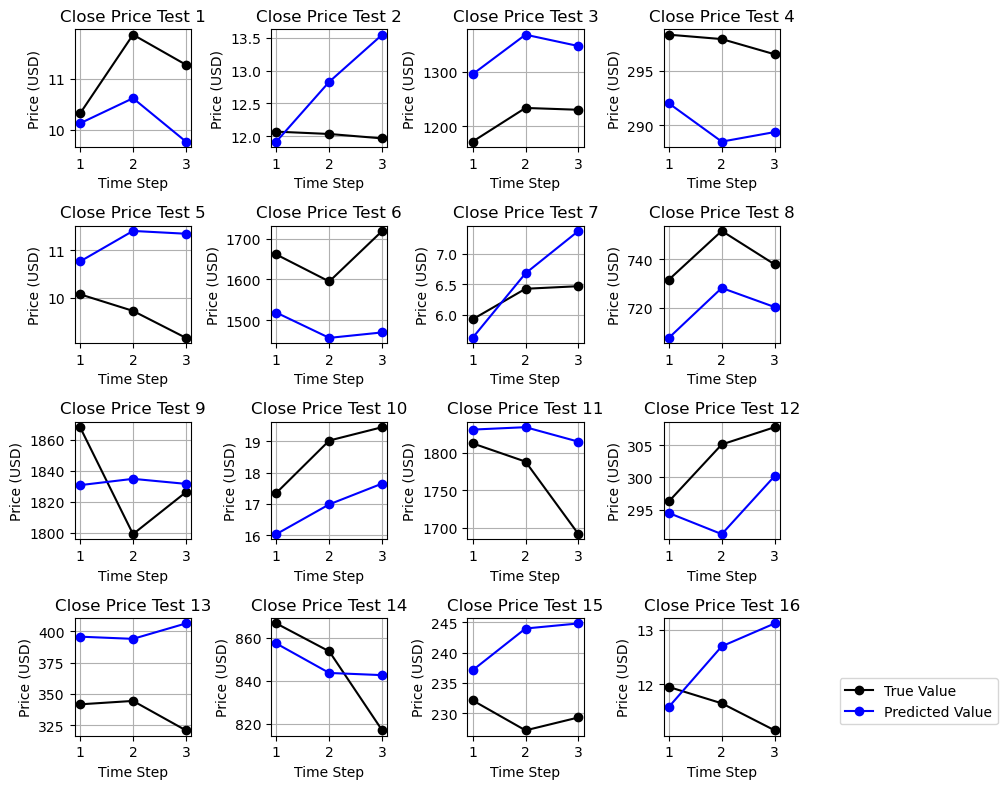

In [67]:
## Multivariate Linear Regression - ETH
data = Ethereum.iloc[:, 4:]
features = data[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']]
features = MinMaxScaler().fit_transform(features) # normalise input
target = data['Close']
target_reshaped = np.array(target).reshape(-1, 1) # normalise output
scaler = MinMaxScaler(feature_range=(0, 1))
target = scaler.fit_transform(target_reshaped).flatten()

input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925

X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

model = LinearRegression()
model.fit(X_train_reshaped, y_train)

y_pred = model.predict(X_test_reshaped)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

time_steps = [1, 2, 3]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, y_pred[i], marker='o', linestyle='-', color='blue', label='Predicted Value')
    ax.set_title(f'Close Price Test {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.5, 0.5), borderaxespad=0.1)

# Show plot
plt.show()

In [68]:
data = Ethereum.iloc[:, 4:]
features = data[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']]
features = MinMaxScaler().fit_transform(features) # normalise input
target = data['Close']
target_reshaped = np.array(target).reshape(-1, 1) # normalise output
scaler = MinMaxScaler(feature_range=(0, 1))
target = scaler.fit_transform(target_reshaped).flatten()

num_experiments = 30 # ensure result is consistent
rmse = []
rmse_1 = [] # steps ahead rmse values across experiments
rmse_2 = []
rmse_3 = []
mae = []
mae_1 = []
mae_2 = []
mae_3 = []
mape = []
mape_1 = []
mape_2 = []
mape_3 = []
seed = 5925

for i in range(num_experiments):
    X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
    X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
    X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
    model = LinearRegression()
    model.fit(X_train_reshaped, y_train)
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    rmse.append(np.sqrt(mse))

    pred_1 = y_pred[:, 0] # prediction at future time step = 1 (Normalised)
    pred_2 = y_pred[:, 1] 
    pred_3 = y_pred[:, 2]
    actual_1 = y_test[:, 0]
    actual_2 = y_test[:, 1]
    actual_3 = y_test[:, 2]

    mse_1 = mean_squared_error(pred_1, actual_1)
    mse_2 = mean_squared_error(pred_2, actual_2)
    mse_3 = mean_squared_error(pred_3, actual_3)
    rmse_1.append(np.sqrt(mse_1))
    rmse_2.append(np.sqrt(mse_2)) 
    rmse_3.append(np.sqrt(mse_3)) 

    # Inverse Transform
    predicted_values = scaler.inverse_transform(y_pred)
    predicted_values_1 = predicted_values[:, 0] # prediction at future time step = 1 (Inverse Transformed)
    predicted_values_2 = predicted_values[:, 1]
    predicted_values_3 = predicted_values[:, 2]
    
    actual_values = scaler.inverse_transform(y_test)
    actual_values_1 = actual_values[:, 0]
    actual_values_2 = actual_values[:, 1]
    actual_values_3 = actual_values[:, 2]

    mae.append(mean_absolute_error(actual_values, predicted_values))
    # Individual time steps
    mae_1.append(mean_absolute_error(actual_values_1, predicted_values_1))
    mae_2.append(mean_absolute_error(actual_values_2, predicted_values_2))
    mae_3.append(mean_absolute_error(actual_values_3, predicted_values_3))
    
    mape.append(mean_absolute_percentage_error(actual_values, predicted_values))
    # Individual time steps
    mape_1.append(mean_absolute_percentage_error(actual_values_1, predicted_values_1))
    mape_2.append(mean_absolute_percentage_error(actual_values_2, predicted_values_2))
    mape_3.append(mean_absolute_percentage_error(actual_values_3, predicted_values_3))

    print(f"Exp {i+1} on test set: RMSE: {rmse[i]:.4f}, MAE: {mae[i]:.2f}, MAPE: {mape[i]:.4f}")
    seed += 1

print("--------------------------------------------")
print(f"Multivariate Linear Regression Avg RMSE: {np.mean(rmse):.4f}, Avg MAE: {np.mean(mae):.2f}, Avg MAPE: {np.mean(mape)*100:.3f}%")
print(f"At time step 1, Avg RMSE: {np.mean(rmse_1):.4f}, Avg MAE: {np.mean(mae_1):.2f}, Avg MAPE: {np.mean(mape_1)*100:.3f}%")
print(f"At time step 2, Avg RMSE: {np.mean(rmse_2):.4f}, Avg MAE: {np.mean(mae_2):.2f}, Avg MAPE: {np.mean(mape_2)*100:.3f}%")
print(f"At time step 3, Avg RMSE: {np.mean(rmse_3):.4f}, Avg MAE: {np.mean(mae_3):.2f}, Avg MAPE: {np.mean(mape_3)*100:.3f}%")
# Avg MAPE: 5.424% (All variables)
# Avg MAPE: 6.41% (Features: 'High', 'Low', 'Open', 'Close')

Exp 1 on test set: RMSE: 0.0179, MAE: 26.94, MAPE: 0.1342
Exp 2 on test set: RMSE: 0.0166, MAE: 28.73, MAPE: 0.1518
Exp 3 on test set: RMSE: 0.0170, MAE: 25.74, MAPE: 0.1750
Exp 4 on test set: RMSE: 0.0159, MAE: 24.71, MAPE: 0.1515
Exp 5 on test set: RMSE: 0.0209, MAE: 31.17, MAPE: 0.1071
Exp 6 on test set: RMSE: 0.0112, MAE: 20.73, MAPE: 0.0937
Exp 7 on test set: RMSE: 0.0167, MAE: 28.69, MAPE: 0.1130
Exp 8 on test set: RMSE: 0.0174, MAE: 25.00, MAPE: 0.1711
Exp 9 on test set: RMSE: 0.0193, MAE: 28.02, MAPE: 0.2394
Exp 10 on test set: RMSE: 0.0166, MAE: 27.83, MAPE: 0.1518
Exp 11 on test set: RMSE: 0.0186, MAE: 26.09, MAPE: 0.2073
Exp 12 on test set: RMSE: 0.0150, MAE: 25.77, MAPE: 0.1472
Exp 13 on test set: RMSE: 0.0148, MAE: 25.62, MAPE: 0.1388
Exp 14 on test set: RMSE: 0.0216, MAE: 29.13, MAPE: 0.1453
Exp 15 on test set: RMSE: 0.0154, MAE: 23.96, MAPE: 0.2476
Exp 16 on test set: RMSE: 0.0196, MAE: 27.04, MAPE: 0.1105
Exp 17 on test set: RMSE: 0.0213, MAE: 32.83, MAPE: 0.1718
Exp 18

In [69]:
## Multivariate Quantile Regression: ETH
data = Ethereum.iloc[:, 4:]
features = data[['High', 'Low', 'Open', 'Close']]
features = MinMaxScaler().fit_transform(features) # normalise input
target = data['Close']
target_reshaped = np.array(target).reshape(-1, 1) # normalise output
scaler = MinMaxScaler(feature_range=(0, 1))
target = scaler.fit_transform(target_reshaped).flatten()

input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8
seed = 5925


X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

from scipy.optimize import minimize

quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

# Use a dictionary to store the results
results = {
    0.05: [],
    0.25: [],
    0.5:  [],
    0.75: [],
    0.95: []
}


for i in quantile:
    initial_beta = np.zeros((X_train.shape[1] * X_train.shape[2], output_size)).flatten()
    result = minimize(tilted_loss, initial_beta, args=(X_train_reshaped, y_train, i), method = 'BFGS')
    beta_hat = result.x.reshape((X_train_reshaped.shape[1], output_size))
    y_pred_test = np.dot(X_test_reshaped, beta_hat)
    y_pred_test = scaler.inverse_transform(y_pred_test)
    results[i] = y_pred_test

y_test = scaler.inverse_transform(y_test)

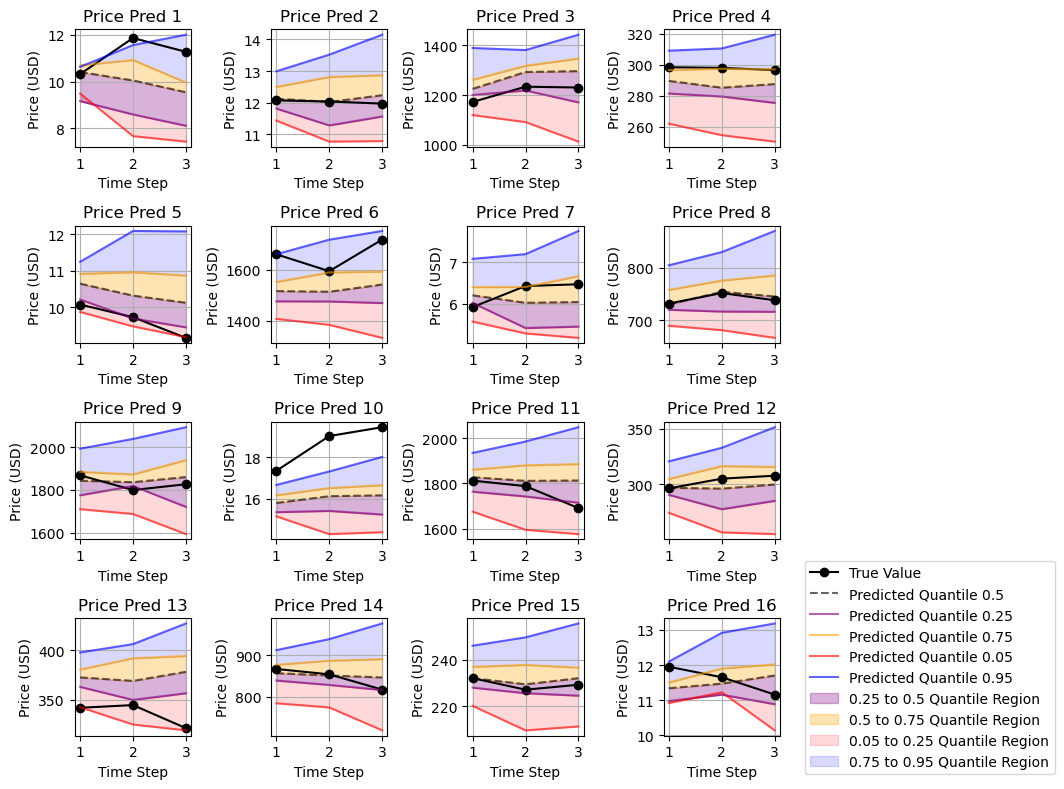

In [70]:
time_steps = [1, 2, 3]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
axs = axs.flatten()
for i in range(16):
    ax = axs[i]
    ax.plot(time_steps, y_test[i], marker='o', linestyle='-', color='black', label='True Value')
    ax.plot(time_steps, results[0.5][i], linestyle='--', color='black', label='Predicted Quantile 0.5', alpha=0.6)
    ax.plot(time_steps, results[0.25][i], linestyle='-', color='purple', label='Predicted Quantile 0.25', alpha=0.6)
    ax.plot(time_steps, results[0.75][i], linestyle='-', color='orange', label='Predicted Quantile 0.75', alpha=0.6)
    ax.plot(time_steps, results[0.05][i], linestyle='-', color='red', label='Predicted Quantile 0.05', alpha=0.6)
    ax.plot(time_steps, results[0.95][i], linestyle='-', color='blue', label='Predicted Quantile 0.95', alpha=0.6)
    
    # Highlight regions between quantiles
    ax.fill_between(time_steps, results[0.25][i], results[0.5][i], color='purple', alpha=0.3, label='0.25 to 0.5 Quantile Region')
    ax.fill_between(time_steps, results[0.5][i], results[0.75][i], color='orange', alpha=0.3, label='0.5 to 0.75 Quantile Region')
    ax.fill_between(time_steps, results[0.05][i], results[0.25][i], color='red', alpha=0.15, label='0.05 to 0.25 Quantile Region')
    ax.fill_between(time_steps, results[0.75][i], results[0.95][i], color='blue', alpha=0.15, label='0.75 to 0.95 Quantile Region')

    ax.set_title(f'Price Pred {i+1}')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Price (USD)')
    ax.grid(True)

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.2, 1.5), borderaxespad=0.1)
plt.show()

In [71]:
data = Ethereum.iloc[:, 4:]
features = data[['High', 'Low', 'Open', 'Close']]
features = MinMaxScaler().fit_transform(features) # normalise input
target = data['Close']
target_reshaped = np.array(target).reshape(-1, 1) # normalise output
scaler = MinMaxScaler(feature_range=(0, 1))
target = scaler.fit_transform(target_reshaped).flatten()

num_experiments = 10
rmse = []
rmse_005 = [] # steps ahead rmse values across different quantiles
rmse_025 = []
rmse_050 = []
rmse_075 = []
rmse_095 = []
rmse_1 = [] # steps ahead rmse values across different experiments - median (0.5)
rmse_2 = []
rmse_3 = []

mae = []
mae_1 = []
mae_2 = []
mae_3 = []
mape = []
mape_1 = []
mape_2 = []
mape_3 = []

seed = 5925

input_size = 5        # 5 steps input
output_size = 3       # 3 steps output
train_ratio = 0.8

for exp in range(num_experiments):
    
    X_train, X_test, y_train, y_test = split_data(data, input_size, output_size, train_ratio, seed)
    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
    X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
    X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

    quantile = [0.05, 0.25, 0.5, 0.75, 0.95]

    # Use a dictionary to store the results
    results = {
        0.05: [],
        0.25: [],
        0.5:  [],
        0.75: [],
        0.95: []
    }
    
    for i in quantile:
        initial_beta = np.zeros((X_train.shape[1] * X_train.shape[2], output_size)).flatten()
        result = minimize(tilted_loss, initial_beta, args=(X_train_reshaped, y_train, i), method = 'BFGS')
        beta_hat = result.x.reshape((X_train_reshaped.shape[1], output_size))
        y_pred_test = np.dot(X_test_reshaped, beta_hat)
        results[i] = y_pred_test

    mse = mean_squared_error(results[0.5], y_test)
    rmse.append(np.sqrt(mse))

    pred_1 = results[0.5][:, 0] # prediction at future time step = 1 (Normalised)
    pred_2 = results[0.5][:, 1] 
    pred_3 = results[0.5][:, 2]
    
    actual_1 = y_test[:, 0]
    actual_2 = y_test[:, 1]
    actual_3 = y_test[:, 2]
    
    # Quantile Average RMSE across 3 steps
    mse_005 = mean_squared_error(results[0.05], y_test)
    mse_025 = mean_squared_error(results[0.25], y_test)
    mse_050 = mean_squared_error(results[0.5], y_test)
    mse_075 = mean_squared_error(results[0.75], y_test)
    mse_095 = mean_squared_error(results[0.95], y_test)
    rmse_005.append(np.sqrt(mse_005))
    rmse_025.append(np.sqrt(mse_025))
    rmse_050.append(np.sqrt(mse_050))
    rmse_075.append(np.sqrt(mse_075))
    rmse_095.append(np.sqrt(mse_095))

    # Steps Ahead RMSE: only interested in prediction (median: 0.5)
    mse_1 = mean_squared_error(pred_1, actual_1)
    mse_2 = mean_squared_error(pred_2, actual_2)
    mse_3 = mean_squared_error(pred_3, actual_3)
    rmse_1.append(np.sqrt(mse_1))
    rmse_2.append(np.sqrt(mse_2))
    rmse_3.append(np.sqrt(mse_3))
    
    # Inverse Transform
    predicted_values = scaler.inverse_transform(results[0.5])
    predicted_values_1 = predicted_values[:, 0] # prediction at future time step = 1 (Inverse Transformed)
    predicted_values_2 = predicted_values[:, 1]
    predicted_values_3 = predicted_values[:, 2]

    actual_values = scaler.inverse_transform(y_test)
    actual_values_1 = actual_values[:, 0]
    actual_values_2 = actual_values[:, 1]
    actual_values_3 = actual_values[:, 2]

    mae.append(mean_absolute_error(actual_values, predicted_values))
    # Individual time steps
    mae_1.append(mean_absolute_error(actual_values_1, predicted_values_1))
    mae_2.append(mean_absolute_error(actual_values_2, predicted_values_2))
    mae_3.append(mean_absolute_error(actual_values_3, predicted_values_3))
    
    mape.append(mean_absolute_percentage_error(actual_values, predicted_values))
    # Individual time steps
    mape_1.append(mean_absolute_percentage_error(actual_values_1, predicted_values_1))
    mape_2.append(mean_absolute_percentage_error(actual_values_2, predicted_values_2))
    mape_3.append(mean_absolute_percentage_error(actual_values_3, predicted_values_3))

    print(f"Exp {exp+1} on test set: RMSE: {rmse[exp]:.4f}, MAE: {mae[exp]:.2f}, MAPE: {mape[exp]:.4f}")
    seed += 1

print("--------------------------------------------")
print(f"Multivariate Quantile Regression Avg RMSE: {np.mean(rmse):.4f}, Avg MAE: {np.mean(mae):.2f}, Avg MAPE: {np.mean(mape)*100:.3f}%")
print(f"At time step 1, Avg RMSE: {np.mean(rmse_1):.4f}, Avg MAE: {np.mean(mae_1):.2f}, Avg MAPE: {np.mean(mape_1)*100:.3f}%")
print(f"At time step 2, Avg RMSE: {np.mean(rmse_2):.4f}, Avg MAE: {np.mean(mae_2):.2f}, Avg MAPE: {np.mean(mape_2)*100:.3f}%")
print(f"At time step 3, Avg RMSE: {np.mean(rmse_3):.4f}, Avg MAE: {np.mean(mae_3):.2f}, Avg MAPE: {np.mean(mape_3)*100:.3f}%")
print("--------------------------------------------")
print(f"At Quantile 0.05, it has Avg RMSE: {np.mean(rmse_005):.4f}")
print(f"At Quantile 0.25, it has Avg RMSE: {np.mean(rmse_025):.4f}")
print(f"At Quantile 0.50, it has Avg RMSE: {np.mean(rmse_050):.4f}")
print(f"At Quantile 0.75, it has Avg RMSE: {np.mean(rmse_075):.4f}")
print(f"At Quantile 0.95, it has Avg RMSE: {np.mean(rmse_095):.4f}")

Exp 1 on test set: RMSE: 0.0178, MAE: 25.80, MAPE: 0.0630
Exp 2 on test set: RMSE: 0.0156, MAE: 25.88, MAPE: 0.0599
Exp 3 on test set: RMSE: 0.0158, MAE: 23.20, MAPE: 0.0597
Exp 4 on test set: RMSE: 0.0145, MAE: 22.40, MAPE: 0.0611
Exp 5 on test set: RMSE: 0.0183, MAE: 27.94, MAPE: 0.0631
Exp 6 on test set: RMSE: 0.0102, MAE: 18.59, MAPE: 0.0612
Exp 7 on test set: RMSE: 0.0165, MAE: 26.31, MAPE: 0.0589
Exp 8 on test set: RMSE: 0.0160, MAE: 22.77, MAPE: 0.0616
Exp 9 on test set: RMSE: 0.0175, MAE: 25.16, MAPE: 0.0609
Exp 10 on test set: RMSE: 0.0181, MAE: 27.05, MAPE: 0.0640
--------------------------------------------
Multivariate Quantile Regression Avg RMSE: 0.0160, Avg MAE: 24.51, Avg MAPE: 6.133%
At time step 1, Avg RMSE: 0.0115, Avg MAE: 17.41, Avg MAPE: 4.259%
At time step 2, Avg RMSE: 0.0156, Avg MAE: 24.43, Avg MAPE: 6.226%
At time step 3, Avg RMSE: 0.0198, Avg MAE: 31.69, Avg MAPE: 7.914%
--------------------------------------------
At Quantile 0.05, it has Avg RMSE: 0.0277
At